0.08873387174005065x^3+-15.805872584589332x^2+888.9818612839775x+1022.3805529054996


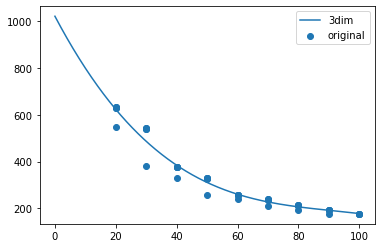

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

if __name__ == "__main__":
    df = pd.read_csv("../data/ObjectDistanceDatas.csv")
    df = df[['dist', 'width']].query('dist > 15')
    x = df['dist']
    y = df['width']
    
    x_lim = np.linspace(0,100,1000)
    
    #近似式の係数
    res1=np.polyfit(x, y, 1)
    res2=np.polyfit(x, y, 2)
    res3=np.polyfit(x, y, 3)
    res4=np.polyfit(x, y, 4)
    res5=np.polyfit(x, y, 5)
    
    #近似式の計算
    y1 = np.poly1d(res1)(x_lim) #1次
    y2 = np.poly1d(res2)(x_lim) #2次
    y3 = np.poly1d(res3)(x_lim) #3次
    y4 = np.poly1d(res4)(x_lim)
    y5 = np.poly1d(res5)(x_lim)
    

    #グラフ表示
    plt.scatter(x, y, label='original')
    #plt.plot(x_lim, y1, label='1dim')
    #plt.plot(x_lim, y2, label='2dim')
    plt.plot(x_lim, y3, label='3dim')
    #plt.plot(x_lim, y4, label='4dim')
    #plt.plot(x_lim, y5, label='5dim')
    
    print("{}x^3+{}x^2+{}x+{}".format(res2[0], res2[1], res2[2], res3[3]))
    
    Determination_factors = [res2[0], res2[1], res2[2], res3[3]]
    df=pd.DataFrame([[res3[0], res3[1], res3[2], res3[3]]], columns=['3dim','2dim', '1dim', '0dim'])
    df.to_csv("../data/Determination_factors.csv", index=False)
    plt.legend()
    plt.show()